<a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/colab/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

This is the **official YOLOv5 🚀 notebook** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [7]:
!pip install -r requirements.txt

In [1]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5  v6.1-191-gd29df68 Python-3.8.8 torch-1.7.0 CUDA:0 (NVIDIA GeForce GTX 1070, 8192MiB)


Setup complete  (8 CPUs, 15.9 GB RAM, 198.4/465.1 GB disk)


# 1. Inference

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [2]:
!python detect.py --weights ./runs/train/exp1/weights/best.pt --img 640 --conf 0.25 --source ../datasets/testingVal/
display.Image(filename='./runs/detect/exp1/', width=600)

detect: weights=['./runs/train/exp1/weights/best.pt'], source=../datasets/testingVal/, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-191-gd29df68 Python-3.8.8 torch-1.7.0 CUDA:0 (NVIDIA GeForce GTX 1070, 8192MiB)

Fusing layers... 
YOLOv5s summary: 232 layers, 7462278 parameters, 0 gradients, 17.5 GFLOPs
image 1/8 C:\Users\DilDoooo\Downloads\yoolo\datasets\testingVal\rs00090_png.rf.b5bb9e2425fbbca4cf1052c0293520a8.jpg: 640x640 1 sheep, 1 rail, Done. (0.012s)
image 2/8 C:\Users\DilDoooo\Downloads\yoolo\datasets\testingVal\rs01278_jpg.rf.9aa3ded9020de62b76afd08296351c3a.jpg: 640x640 3 sheeps, 1 rail, Done. (0.020s)
image 3/8 C:\Users\DilDoooo\Dow

AttributeError: 'function' object has no attribute 'Image'

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/127574988-6a558aa1-d268-44b9-bf6b-62d4c605cc72.jpg" width="600">

# 2. Validate
Validate a model's accuracy on [COCO](https://cocodataset.org/#home) val or test-dev datasets. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be ~1% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

## COCO val
Download [COCO val 2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L14) dataset (1GB - 5000 images), and test model accuracy.

In [3]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [4]:
# Run YOLOv5x on COCO val
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5x.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-174-gc4cb7c6 torch 1.11.0+cu113 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

100% 166M/166M [00:05<00:00, 33.5MB/s]

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 49.6MB/s]
val: Scanning '/content/datasets/coco/val2017' images and labels...4952 found, 48 missing, 0 empty, 0 corrupt: 100% 5000/5000 [00:00<00:00, 10667.19it/s]
val: New cache created: /content/datasets/coco/val2017.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 157/157 [00:58<00:00,  2.70it/s]
                 all       5000      36335      0.743      0.626      0.683 

## COCO test
Download [COCO test2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L15) dataset (7GB - 40,000 images), to test model accuracy on test-dev set (**20,000 images, no labels**). Results are saved to a `*.json` file which should be **zipped** and submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017labels.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f -d ../datasets/coco/images

In [ ]:
# Run YOLOv5x on COCO test
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half --task test

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br><br>

## Train on Custom Data with Roboflow 🌟 NEW

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

- Custom Training Example: [https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/](https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/?ref=ultralytics)
- Custom Training Notebook: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/yolov5-custom-training-tutorial/blob/main/yolov5-custom-training.ipynb)
<br>

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="480" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/6152a275ad4b4ac20cd2e21a_roboflow-annotate.gif"/></a></p>Label images lightning fast (including with model-assisted labeling)

In [20]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [2]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

Note: you may need to restart the kernel to use updated packages.


wandb: Currently logged in as: andrew513. Use `wandb login --relogin` to force relogin


True

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
%run train.py --data coco128.yaml --cfg yolov5s.yaml --weights best.pt --batch-size 8 --epoch 50 --save-period 5

wandb: Currently logged in as: andrew513. Use `wandb login --relogin` to force relogin
train: weights=best.pt, cfg=yolov5s.yaml, data=coco128.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=5, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 39 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.1-191-gd29df68 Python-3.8.8 torch-1.7.0 CUDA:0 (NVIDIA GeForce GTX 1070, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentu

YOLOv5 temporarily requires wandb version 0.12.10 or below. Some features may not work as expected.
Overriding model.yaml nc=80 with nc=81

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     19904  models.common.BottleneckCSP             [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  3    161152  models.common.BottleneckCSP             [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    641792  models.common.BottleneckCSP             [256, 256, 3]                 
  7 

In [1]:
cd ../generate_npy

C:\Users\DilDoooo\Downloads\yoolo\generate_npy


In [2]:
!python yolov5_generate_npy.py --input-h 416 --input-w 416

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 0A6E-4087

 Directory of C:\Users\DilDoooo\Downloads\yoolo\generate_npy

2022/05/16  下午 11:00    <DIR>          .
2022/05/16  下午 11:00    <DIR>          ..
2022/04/11  上午 05:52    <DIR>          .ipynb_checkpoints
2022/06/14  下午 04:35             1,480 20_416x416.npy
2021/06/03  下午 07:58             1,088 20_480x256.npy
2022/06/14  下午 04:35             5,536 40_416x416.npy
2021/06/03  下午 07:58             3,968 40_480x256.npy
2022/06/14  下午 04:35            21,760 80_416x416.npy
2021/06/03  下午 07:58            15,488 80_480x256.npy
2021/06/03  下午 07:58               998 yolov5_generate_npy.py
               7 File(s)         50,318 bytes
               3 Dir(s)  295,602,348,032 bytes free


In [4]:
cd ../yolov5/

C:\Users\DilDoooo\Downloads\yoolo\yolov5


In [5]:
%pycat ./data/model_paths_520_coco128.yaml

In [10]:
!python ../exporting/yolov5_export.py --data ./data/model_paths_520_coco128.yaml 

Overriding model.yaml nc=80 with nc=81

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     19904  models.common.BottleneckCSP             [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  3    161152  models.common.BottleneckCSP             [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    641792  models.common.BottleneckCSP             [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]            

Overriding ./models/yolov5s.yaml nc=80 with nc=81
self.vanish_point 0.0

Starting ONNX export with onnx 1.8.1...
****onnx file**** ./yolov5s-coco128.onnx
graph torch-jit-export (
  %images[FLOAT, 1x3x416x416]
) optional inputs with matching initializers (
  %model.2.cv2.weight[FLOAT, 32x64x1x1]
  %model.2.cv3.weight[FLOAT, 32x32x1x1]
  %model.2.bn.weight[FLOAT, 64]
  %model.2.bn.bias[FLOAT, 64]
  %model.2.bn.running_mean[FLOAT, 64]
  %model.2.bn.running_var[FLOAT, 64]
  %model.4.cv2.weight[FLOAT, 64x128x1x1]
  %model.4.cv3.weight[FLOAT, 64x64x1x1]
  %model.4.bn.weight[FLOAT, 128]
  %model.4.bn.bias[FLOAT, 128]
  %model.4.bn.running_mean[FLOAT, 128]
  %model.4.bn.running_var[FLOAT, 128]
  %model.6.cv2.weight[FLOAT, 128x256x1x1]
  %model.6.cv3.weight[FLOAT, 128x128x1x1]
  %model.6.bn.weight[FLOAT, 256]
  %model.6.bn.bias[FLOAT, 256]
  %model.6.bn.running_mean[FLOAT, 256]
  %model.6.bn.running_var[FLOAT, 256]
  %model.9.cv2.weight[FLOAT, 256x512x1x1]
  %model.9.cv3.weight[FLOAT, 256x256x1

  %752[FLOAT, 128]
  %754[FLOAT, 128x128x3x3]
  %755[FLOAT, 128]
  %757[FLOAT, 256x256x1x1]
  %758[FLOAT, 256]
  %760[FLOAT, 256x256x3x3]
  %761[FLOAT, 256]
  %763[FLOAT, 256x512x1x1]
  %764[FLOAT, 256]
  %766[FLOAT, 256x256x1x1]
  %767[FLOAT, 256]
  %769[FLOAT, 256x256x3x3]
  %770[FLOAT, 256]
  %772[FLOAT, 512x512x1x1]
  %773[FLOAT, 512]
  %777[INT64, 1]
  %778[INT64, 4]
  %779[FLOAT, 4]
  %780[FLOAT, 4]
) {
  %380 = ConstantOfShape[value = <Tensor>](%777)
  %381 = Concat[axis = 0](%778, %380)
  %382 = Constant[value = <Tensor>]()
  %383 = Reshape(%381, %382)
  %384 = Constant[value = <Tensor>]()
  %385 = Constant[value = <Tensor>]()
  %386 = Constant[value = <Tensor>]()
  %387 = Constant[value = <Tensor>]()
  %388 = Slice(%383, %385, %386, %384, %387)
  %389 = Transpose[perm = [1, 0]](%388)
  %390 = Constant[value = <Tensor>]()
  %391 = Reshape(%389, %390)
  %392 = Cast[to = 7](%391)
  %393 = Constant[value = <Scalar Tensor []>]()
  %394 = Pad[mode = 'constant'](%images, %392, %393)


In [11]:
!python -m onnxsim ./yolov5s-coco128.onnx ./yolov5s-coco128_simplify.onnx

Simplifying...
Ok!


In [7]:
!git clone https://github.com/kneron/ONNX_Convertor.git

fatal: destination path 'ONNX_Convertor' already exists and is not an empty directory.


In [17]:
!python ONNX_Convertor/optimizer_scripts/onnx2onnx.py yolov5s-coco128_simplify.onnx -o yolov5s-coco128_simplify_convert.onnx

All further enhancements and fixes to optimizers will be done in this new repo.
The optimizer code in onnx/onnx repo will be removed in 1.9 release.

All further enhancements and fixes to optimizers will be done in this new repo.
The optimizer code in onnx/onnx repo will be removed in 1.9 release.

All further enhancements and fixes to optimizers will be done in this new repo.
The optimizer code in onnx/onnx repo will be removed in 1.9 release.

All further enhancements and fixes to optimizers will be done in this new repo.
The optimizer code in onnx/onnx repo will be removed in 1.9 release.

All further enhancements and fixes to optimizers will be done in this new repo.
The optimizer code in onnx/onnx repo will be removed in 1.9 release.

All further enhancements and fixes to optimizers will be done in this new repo.
The optimizer code in onnx/onnx repo will be removed in 1.9 release.



INFO:optimizer_scripts:Preprocessing the model...
ERROR:optimizer_scripts:Cannot inference all shapes.


In [ ]:
#inference

In [18]:
!python inference.py --data data/model_paths_520_coco128.yaml --conf_thres 0.6 --img-path ../datasets/testingVal/rs00090_png.rf.b5bb9e2425fbbca4cf1052c0293520a8.jpg --save-path tutorial/demo/out.jpg

Overriding ./models/yolov5s.yaml nc=80 with nc=81
self.vanish_point 0.0
[[196.0, 183.0, 2.0, 2.0, 0.8978571891784668, 18.0], [158.0, 179.0, 78.0, 10.0, 0.8297224044799805, 18.0], [15.0, 0.0, 174.0, 287.0, 0.8030791878700256, 48.0], [85.0, 0.0, 66.0, 398.0, 0.7612695693969727, 48.0], [185.0, 188.0, 2.0, 1.0, 0.7256911396980286, 18.0], [186.0, 180.0, 20.0, 7.0, 0.7227486371994019, 18.0], [34.0, 0.0, 71.0, 259.0, 0.7098170518875122, 48.0], [154.0, 169.0, 81.0, 14.0, 0.6277723908424377, 18.0]]


C:\Users\DilDoooo\Downloads\yoolo\exporting\yolov5\yolov5_postprocess.py:79: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:882.)
  i, j = (x[:, 5:] > conf_thres).nonzero().t()


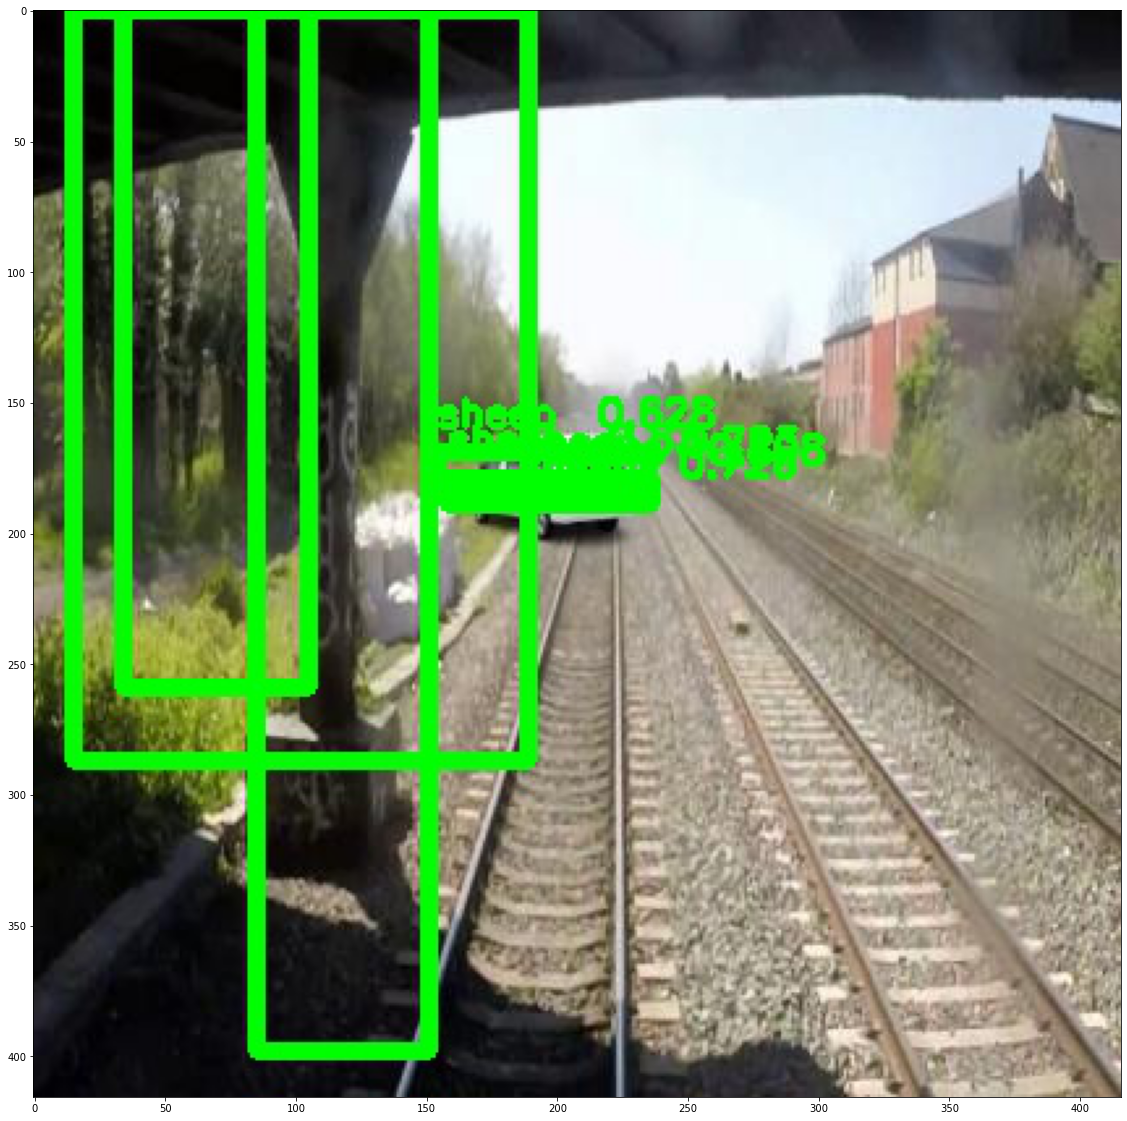

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\DilDoooo\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 遠端主機已強制關閉一個現存的連線。
Exception in callback BaseSelectorEventLoop._read_from_sel

In [19]:
import matplotlib.pyplot as plt
image = plt.imread('./tutorial/demo/out.jpg')
plt.figure(figsize=(20, 20))
plt.imshow(image) 
plt.show()

# 4. Visualize

## Weights & Biases Logging 🌟 NEW

[Weights & Biases](https://wandb.ai/site?utm_campaign=repo_yolo_notebook) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration for teams. To enable W&B `pip install wandb`, and then train normally (you will be guided through setup on first use). 

During training you will see live updates at [https://wandb.ai/home](https://wandb.ai/home?utm_campaign=repo_yolo_notebook), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

<p align="left"><img width="900" alt="Weights & Biases dashboard" src="https://user-images.githubusercontent.com/26833433/135390767-c28b050f-8455-4004-adb0-3b730386e2b2.png"></p>

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and val jpgs to see mosaics, labels, predictions and augmentation effects. Note an Ultralytics **Mosaic Dataloader** is used for training (shown below), which combines 4 images into 1 mosaic during training.

> <img src="https://user-images.githubusercontent.com/26833433/131255960-b536647f-7c61-4f60-bbc5-cb2544d71b2a.jpg" width="700">  
`train_batch0.jpg` shows train batch 0 mosaics and labels

> <img src="https://user-images.githubusercontent.com/26833433/131256748-603cafc7-55d1-4e58-ab26-83657761aed9.jpg" width="700">  
`test_batch0_labels.jpg` shows val batch 0 labels

> <img src="https://user-images.githubusercontent.com/26833433/131256752-3f25d7a5-7b0f-4bb3-ab78-46343c3800fe.jpg" width="700">  
`test_batch0_pred.jpg` shows val batch 0 _predictions_

Training results are automatically logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) as `results.csv`, which is plotted as `results.png` (below) after training completes. You can also plot any `results.csv` file manually:

```python
from utils.plots import plot_results 
plot_results('path/to/results.csv')  # plot 'results.csv' as 'results.png'
```

<img align="left" width="800" alt="COCO128 Training Results" src="https://user-images.githubusercontent.com/26833433/126906780-8c5e2990-6116-4de6-b78a-367244a33ccf.png">

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab and Kaggle** notebooks with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![CI CPU testing](https://github.com/ultralytics/yolov5/workflows/CI%20CPU%20testing/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Reproduce
for x in 'yolov5n', 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x':
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --task speed  # speed
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.001 --iou 0.65  # mAP

In [ ]:
# PyTorch Hub
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Images
dir = 'https://ultralytics.com/images/'
imgs = [dir + f for f in ('zidane.jpg', 'bus.jpg')]  # batch of images

# Inference
results = model(imgs)
results.print()  # or .show(), .save()

In [ ]:
# CI Checks
%%shell
export PYTHONPATH="$PWD"  # to run *.py. files in subdirectories
rm -rf runs  # remove runs/
for m in yolov5n; do  # models
  python train.py --img 64 --batch 32 --weights $m.pt --epochs 1 --device 0  # train pretrained
  python train.py --img 64 --batch 32 --weights '' --cfg $m.yaml --epochs 1 --device 0  # train scratch
  for d in 0 cpu; do  # devices
    python val.py --weights $m.pt --device $d # val official
    python val.py --weights runs/train/exp/weights/best.pt --device $d # val custom
    python detect.py --weights $m.pt --device $d  # detect official
    python detect.py --weights runs/train/exp/weights/best.pt --device $d  # detect custom
  done
  python hubconf.py  # hub
  python models/yolo.py --cfg $m.yaml  # build PyTorch model
  python models/tf.py --weights $m.pt  # build TensorFlow model
  python export.py --img 64 --batch 1 --weights $m.pt --include torchscript onnx  # export
done

In [ ]:
# Profile
from utils.torch_utils import profile

m1 = lambda x: x * torch.sigmoid(x)
m2 = torch.nn.SiLU()
results = profile(input=torch.randn(16, 3, 640, 640), ops=[m1, m2], n=100)

In [ ]:
# Evolve
!python train.py --img 640 --batch 64 --epochs 100 --data coco128.yaml --weights yolov5s.pt --cache --noautoanchor --evolve
!d=runs/train/evolve && cp evolve.* $d && zip -r evolve.zip $d && gsutil mv evolve.zip gs://bucket  # upload results (optional)

In [ ]:
# VOC
for b, m in zip([64, 64, 64, 32, 16], ['yolov5n', 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']):  # batch, model
  !python train.py --batch {b} --weights {m}.pt --data VOC.yaml --epochs 50 --img 512 --hyp hyp.VOC.yaml --project VOC --name {m} --cache

In [ ]:
# TensorRT 
# https://docs.nvidia.com/deeplearning/tensorrt/install-guide/index.html#installing-pip
!pip install -U nvidia-tensorrt --index-url https://pypi.ngc.nvidia.com  # install
!python export.py --weights yolov5s.pt --include engine --imgsz 640 640 --device 0  # export
!python detect.py --weights yolov5s.engine --imgsz 640 640 --device 0  # inference